<a href="https://colab.research.google.com/github/Xserve11/Stable_Diffusion/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirement for testing
 - Tesla T4 GPU
 - or Higher.

> Thats All.



1. Start installing Keras_CV and Tensorflow

In [ ]:
pip install keras_cv tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.0 MB/s eta 0:00:00


2. Next, importing the modules used in this generator

In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow import keras
import keras_cv

Using TensorFlow backend


3. Create a model for the image generator

In [ ]:
models = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


4. Try to generate several image. I recommend 2 batch of images per session
> PS : More than 2 batch require more resource to be used.



198180272/198180272 [==============================] - 3s 0us/step


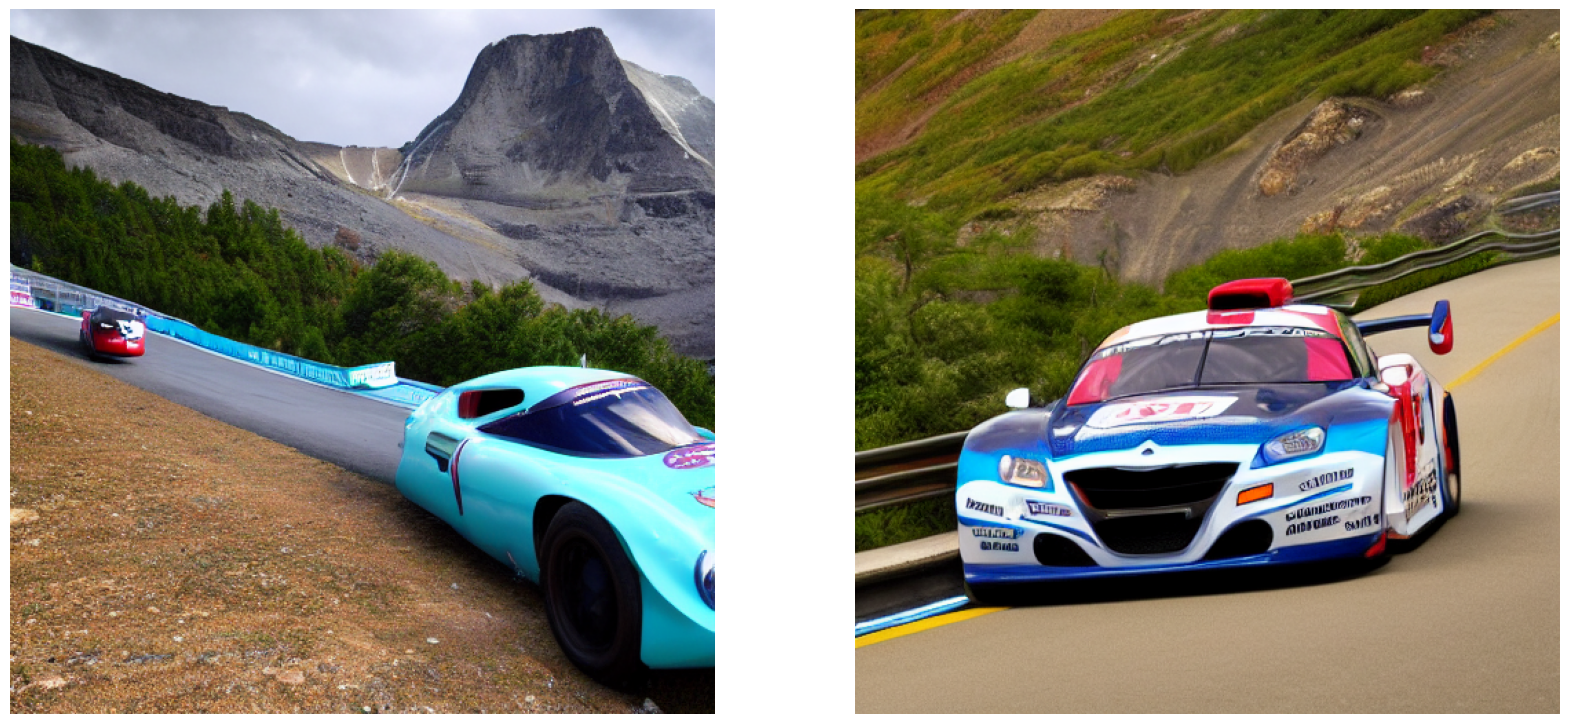

In [ ]:
# Used For the machine trigger on what to generate by converting text to images
images = models.text_to_image("A mountain with racing cars", batch_size=2)

#Pyplot used to draw/display the image, which was generated by.
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)